In [33]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
"""
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'landscape-image-colorization:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1036526%2F1913658%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240814%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240814T105254Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D61a10711419faa4c11e692fc47b459c686f78b78af94f29b29e17ea291d642513408e852b519e314400ebf6f10396ea82c1d4489bc06310cb90286fb365259abbc1a12458cda3653030f952e175716212e951ef1eced90323d078f72c1a56122911036ed9f727f52abe639d312125cfc5f3a044109a5f58a0d968e581426cff9fd24cee653222162475d26610f35b09b9350a763a43ec682a426baf7bf6376e202358f74e63a040297604e1717d43ced7cd8594d88ce7ac2d701f28c78fffe34e0d60104994136db6ab99dac7e9759a37197fd4656937fad2f63b044e6ea9b2b8d19f52c1deb7960dd8c58fdf645f121854930672a5b7ed9a3db03ed3813fa9d'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')
"""


'\nimport os\nimport sys\nfrom tempfile import NamedTemporaryFile\nfrom urllib.request import urlopen\nfrom urllib.parse import unquote, urlparse\nfrom urllib.error import HTTPError\nfrom zipfile import ZipFile\nimport tarfile\nimport shutil\n\nCHUNK_SIZE = 40960\nDATA_SOURCE_MAPPING = \'landscape-image-colorization:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1036526%2F1913658%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240814%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240814T105254Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D61a10711419faa4c11e692fc47b459c686f78b78af94f29b29e17ea291d642513408e852b519e314400ebf6f10396ea82c1d4489bc06310cb90286fb365259abbc1a12458cda3653030f952e175716212e951ef1eced90323d078f72c1a56122911036ed9f727f52abe639d312125cfc5f3a044109a5f58a0d968e581426cff9fd24cee653222162475d26610f35b09b9350a763a43ec682

## Introduction
Autoencoder are special type of deep learning architecture that consist of two networks encoder and decoder.
The encoder, through a series of CNN and downsampling, learns a reduced dimensional representation of the input data while decoder  through the use of CNN and upsampling, attempts to regenerate the data from the these representations. A well-trained decoder is able to regenerated data that is identical or as close as possible to the original input data.
Autoencoder are generally used for anamoly detection, denoising image, colorizing the images. Here, i am going to colorize the landscape images using autoencoder.

<img src = 'https://miro.medium.com/max/600/1*nqzWupxC60iAH2dYrFT78Q.png' >

## Image Colorization
Image colorization using different softwares require large amount of human effort, time and skill.But special type of deep learning architecture called autoencoder has made this task quiet easy. Automatic image colorization often involves the use of a class of convolutional neural networks (CNN) called autoencoders. These neural networks are able to distill the salient features of an image, and then regenerate the image based on these learned features.

<img src = "https://tinyclouds.org/colorize/best/6.jpg">

## Import necessary libraries

In [34]:
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Input,Dropout
from keras.models import Sequential
from keras.preprocessing.image import img_to_array
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

### Getting landscape image data,resizing them and appending in array
To get the image in sorted order i have defined the function sorted_alphanumeric. Here, I have used open cv library to read and resize images. Finally images are normalized and are converted to array and are appended in empty list

In [35]:
# Function to get files in proper order
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(data, key=alphanum_key)
from tensorflow.keras.utils import Sequence
# Keras data generator class
class ImageDataGenerator(Sequence):
    def __init__(self, color_path, gray_path, batch_size, img_size, limit=6000, **kwargs):
        super().__init__(**kwargs)  # Ensure compatibility with Keras by calling the superclass initializer
        self.color_path = color_path
        self.gray_path = gray_path
        self.batch_size = batch_size
        self.img_size = img_size
        self.limit = limit

        # Load and sort files
        self.color_files = sorted_alphanumeric(os.listdir(color_path))[:limit]
        self.gray_files = sorted_alphanumeric(os.listdir(gray_path))[:limit]
        self.indexes = np.arange(len(self.color_files))

    def __len__(self):
        # Number of batches per epoch
        return int(np.ceil(len(self.color_files) / self.batch_size))

    def __getitem__(self, index):
        # Generate indexes of the batch
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        # Initialize batches of color and gray images
        color_batch = np.empty((len(batch_indexes), self.img_size, self.img_size, 3), dtype=np.float32)
        gray_batch = np.empty((len(batch_indexes), self.img_size, self.img_size, 3), dtype=np.float32)

        for i, idx in enumerate(batch_indexes):
            # Load and process color image
            color_img = cv2.imread(os.path.join(self.color_path, self.color_files[idx]), 1)
            color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
            color_img = cv2.resize(color_img, (self.img_size, self.img_size))
            color_img = color_img.astype('float32') / 255.0

            # Load and process gray image
            gray_img = cv2.imread(os.path.join(self.gray_path, self.gray_files[idx]), 1)
            gray_img = cv2.resize(gray_img, (self.img_size, self.img_size))
            gray_img = gray_img.astype('float32') / 255.0

            # Store samples
            color_batch[i] = img_to_array(color_img)
            gray_batch[i] = img_to_array(gray_img)

        return gray_batch, color_batch

    def on_epoch_end(self):
        # Shuffle indexes after each epoch if necessary
        np.random.shuffle(self.indexes)

# Paths to your datasets
color_path = '../input/landscape-image-colorization/landscape Images/color'
gray_path = '../input/landscape-image-colorization/landscape Images/gray'

### Slicing and reshaping
Out of 5000 images I have sliced them to two part. train images consist 4000 images  while test images contains 1000 images.
After slicing the image array, I reshaped them so that images can be fed directly into our encoder network

In [36]:
"""
#train_gray_image = gray_img[:5500]
#train_color_image = color_img[:5500]

test_gray_image = gray_img[5500:]
test_color_image = color_img[5500:]
# reshaping
#train_g = np.reshape(train_gray_image,(len(train_gray_image),SIZE,SIZE,3))
#train_c = np.reshape(train_color_image, (len(train_color_image),SIZE,SIZE,3))
#print('Train color image shape:',train_c.shape)
"""

"\ntrain_gray_image = gray_img[:5500]\ntrain_color_image = color_img[:5500]\n\ntest_gray_image = gray_img[5500:]\ntest_color_image = color_img[5500:]\n# reshaping\ntrain_g = np.reshape(train_gray_image,(len(train_gray_image),SIZE,SIZE,3))\ntrain_c = np.reshape(train_color_image, (len(train_color_image),SIZE,SIZE,3))\nprint('Train color image shape:',train_c.shape)\n"

## Defining our model
Encoder layer of our model consist blocks of Convolution layer with different number of kernel and kernel_size. Here, Convolution is used for downsampling.
Similary, Decoder layer of our model consist of  transpose convolution layer with different kernel size. Here, Decoder layer upsample image downsampled by encoder.
Since there is feature loss between the encoder and decoder layers so inorder to prevent feature loss i have concatenate corresponding encoder and decoder layers. Check U_Net architecture for better understanding......

In [37]:
from keras import layers
def down(filters , kernel_size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(layers.Conv2D(filters,kernel_size,padding = 'same', strides = 2))
    if apply_batch_normalization:
        downsample.add(layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample


def up(filters, kernel_size, dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(layers.Conv2DTranspose(filters, kernel_size,padding = 'same', strides = 2))
    if dropout:
        upsample.dropout(0.2)
    upsample.add(keras.layers.LeakyReLU())
    return upsample


In [38]:
def model():
    inputs = layers.Input(shape= [160,160,3])
    d1 = down(128,(3,3),False)(inputs)
    d2 = down(128,(3,3),False)(d1)
    d3 = down(256,(3,3),True)(d2)
    d4 = down(512,(3,3),True)(d3)

    d5 = down(512,(3,3),True)(d4)
    #upsampling
    u1 = up(512,(3,3),False)(d5)
    u1 = layers.concatenate([u1,d4])
    u2 = up(256,(3,3),False)(u1)
    u2 = layers.concatenate([u2,d3])
    u3 = up(128,(3,3),False)(u2)
    u3 = layers.concatenate([u3,d2])
    u4 = up(128,(3,3),False)(u3)
    u4 = layers.concatenate([u4,d1])
    u5 = up(3,(3,3),False)(u4)
    u5 = layers.concatenate([u5,inputs])
    output = layers.Conv2D(3,(2,2),strides = 1, padding = 'same')(u5)
    return tf.keras.Model(inputs=inputs, outputs=output)

In [39]:
model = model()
model.summary()

Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_34            │ (None, 160, 160, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_30             │ (None, 80, 80, 128)    │          3,584 │ input_layer_34[0][0]   │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_31             │ (None, 40, 40, 128)    │        147,584 │ sequential_30[0][0]    │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_32             │ (None, 20, 20, 256)    │        296,192 │ sequential_31[0][0]    │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_33             │ (None, 10, 10, 512)    │      1,182,208 │ sequential_32[0][0]    │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_34             │ (None, 5, 5, 512)      │      2,361,856 │ sequential_33[0][0]    │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_35             │ (None, 10, 10, 512)    │      2,359,808 │ sequential_34[0][0]    │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_15            │ (None, 10, 10, 1024)   │              0 │ sequential_35[0][0],   │
│ (Concatenate)             │                        │                │ sequential_33[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_36             │ (None, 20, 20, 256)    │      2,359,552 │ concatenate_15[0][0]   │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_16            │ (None, 20, 20, 512)    │              0 │ sequential_36[0][0],   │
│ (Concatenate)             │                        │                │ sequential_32[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_37             │ (None, 40, 40, 128)    │        589,952 │ concatenate_16[0][0]   │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_17            │ (None, 40, 40, 256)    │              0 │ sequential_37[0][0],   │
│ (Concatenate)             │                        │                │ sequential_31[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_38             │ (None, 80, 80, 128)    │        295,040 │ concatenate_17[0][0]   │
│ (Sequential)              │                        │                │                        │
├──────────────────────

 Total params: 9,602,766 (36.63 MB)

 Trainable params: 9,600,206 (36.62 MB)

 Non-trainable params: 2,560 (10.00 KB)

### Fitting our model

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])

# Image size and batch size
SIZE = 160
BATCH_SIZE = 50
LIMIT = 5500
# Example: fitting the model
train_gen = ImageDataGenerator(
    color_path=color_path,
    gray_path=gray_path,
    batch_size=BATCH_SIZE,
    img_size=SIZE,
    limit=LIMIT)

model.fit(
    train_gen,
    epochs=50,
    verbose=2,
    steps_per_epoch=len(train_gen)
)

Epoch 1/50


In [41]:
model.evaluate(test_gray_image,test_color_image)

NameError: name 'test_gray_image' is not defined

In [42]:
# Keras data generator class
class TestImageGenerator(Sequence):
    def __init__(self, color_path, gray_path, batch_size, img_size, limit=6000, **kwargs):
        super().__init__(**kwargs)  # Ensure compatibility with Keras by calling the superclass initializer
        self.color_path = color_path
        self.gray_path = gray_path
        self.batch_size = batch_size
        self.img_size = img_size
        self.limit = limit

        # Load and sort files
        self.color_files = sorted_alphanumeric(os.listdir(color_path))[limit:]
        self.gray_files = sorted_alphanumeric(os.listdir(gray_path))[limit:]
        self.indexes = np.arange(len(self.color_files))

    def __len__(self):
        # Number of batches per epoch
        return int(np.ceil(len(self.color_files) / self.batch_size))

    def __getitem__(self, index):
        # Generate indexes of the batch
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        # Initialize batches of color and gray images
        color_batch = np.empty((len(batch_indexes), self.img_size, self.img_size, 3), dtype=np.float32)
        gray_batch = np.empty((len(batch_indexes), self.img_size, self.img_size, 3), dtype=np.float32)

        for i, idx in enumerate(batch_indexes):
            # Load and process color image
            color_img = cv2.imread(os.path.join(self.color_path, self.color_files[idx]), 1)
            color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
            color_img = cv2.resize(color_img, (self.img_size, self.img_size))
            color_img = color_img.astype('float32') / 255.0

            # Load and process gray image
            gray_img = cv2.imread(os.path.join(self.gray_path, self.gray_files[idx]), 1)
            gray_img = cv2.resize(gray_img, (self.img_size, self.img_size))
            gray_img = gray_img.astype('float32') / 255.0

            # Store samples
            color_batch[i] = img_to_array(color_img)
            gray_batch[i] = img_to_array(gray_img)

        return gray_batch, color_batch

    def on_epoch_end(self):
        # Shuffle indexes after each epoch if necessary
        np.random.shuffle(self.indexes)

In [43]:
# Example: fitting the model
test_gen = TestImageGenerator(
    color_path=color_path,
    gray_path=gray_path,
    batch_size=BATCH_SIZE,
    img_size=SIZE,
    limit=300)

model.evaluate(test_gen)

137/137 ━━━━━━━━━━━━━━━━━━━━ 751s 5s/step - acc: 0.3157 - loss: 0.0900


[0.09046386927366257, 0.31852468848228455]

# plotting colorized image along with grayscale and color image

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step


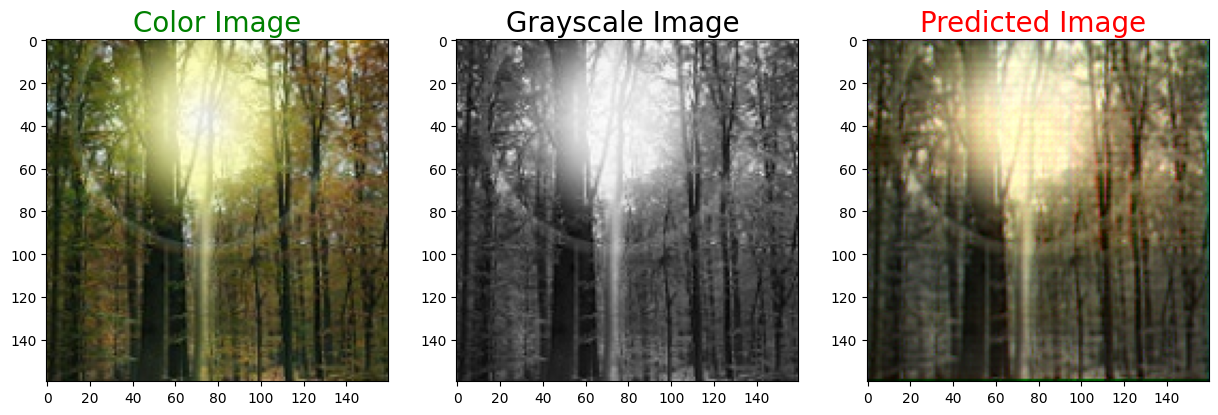

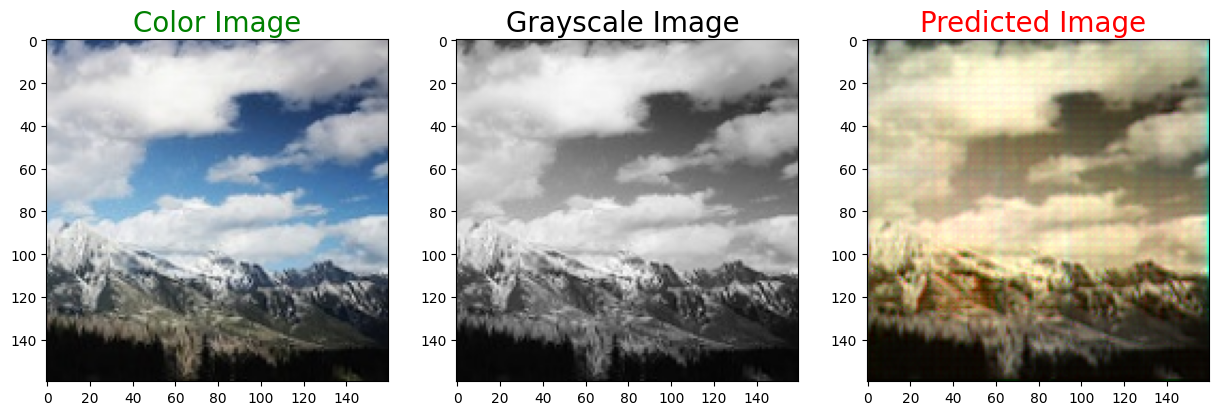

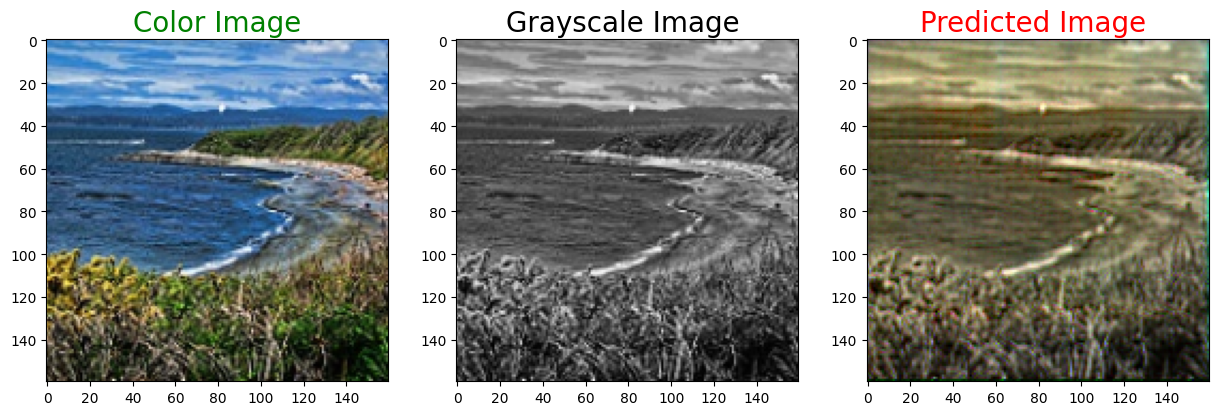

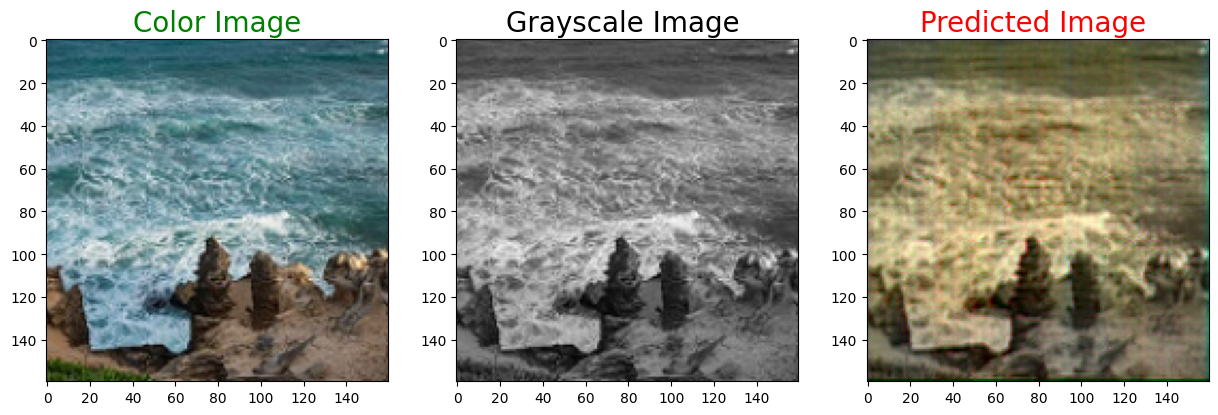

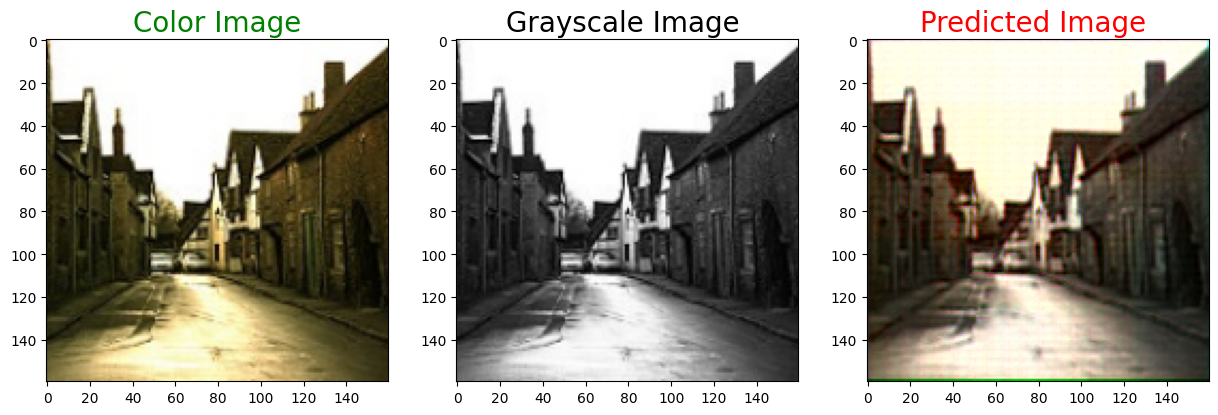

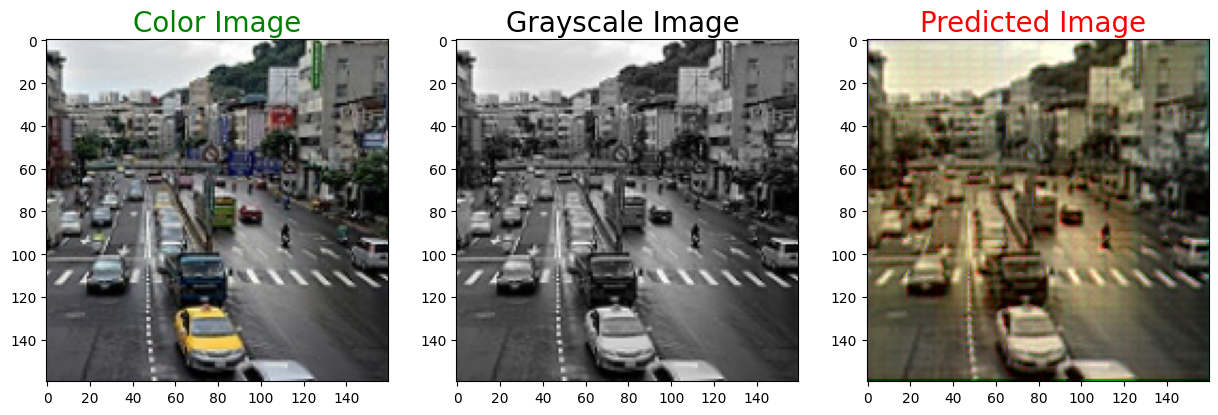

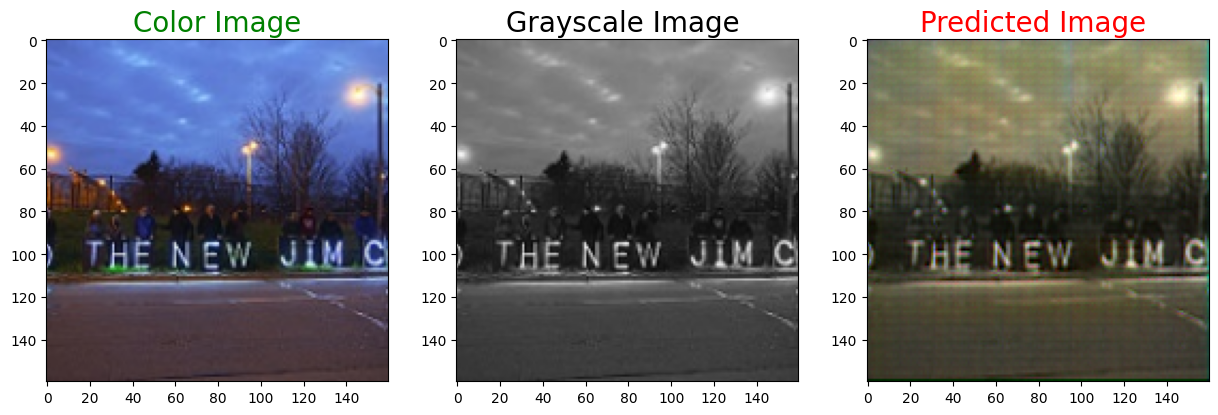

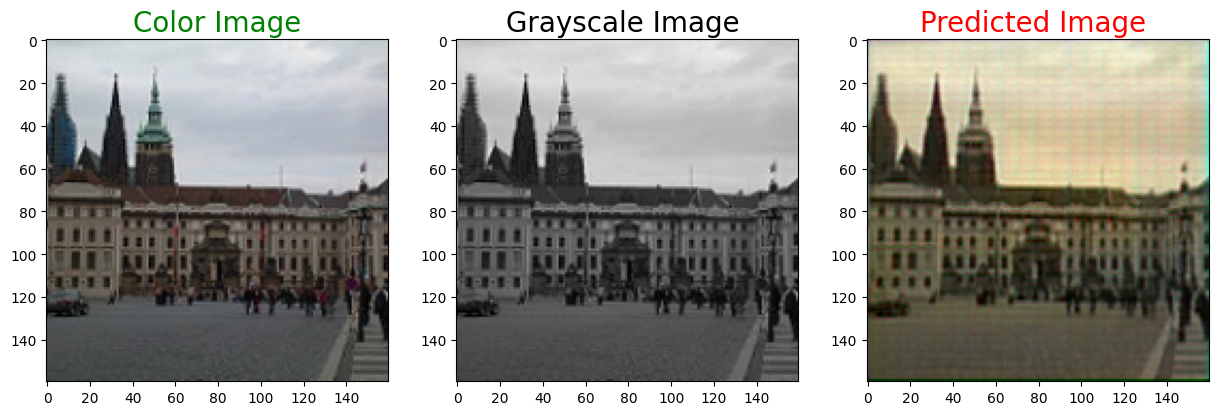

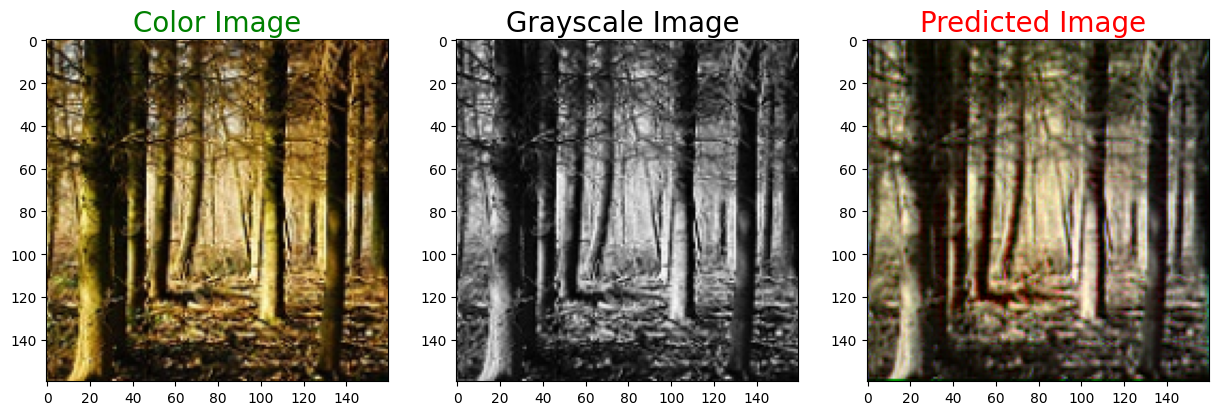

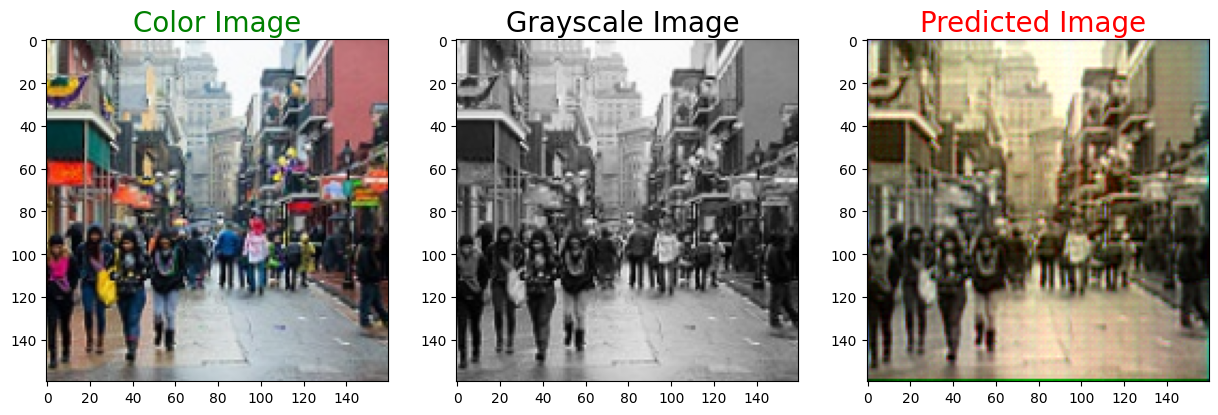

In [58]:
# defining function to plot images pair
def plot_images(color,grayscale,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)

    plt.show()

predicted = model.predict(test_gen[0][0])
for i in range(0,10):
    plot_images(test_gen[0][1][i],test_gen[0][0][i],predicted[i])


# Thanks for your visit.
## Any suggestions to improve this model is highly appreciated.
# Feel free to  comment